프로그래머스 : 거리두기 확인하기

[[바로가기]](https://school.programmers.co.kr/learn/courses/30/lessons/81302?language=python3)

> 문제 요약
- 대기실은 5개, (5x5크기)
- 맨허튼 거리 > x, y 값 차이의 합이 2 이하면 안된다.
- 파티션으로 막혀있는 경우 2이하여도 허용
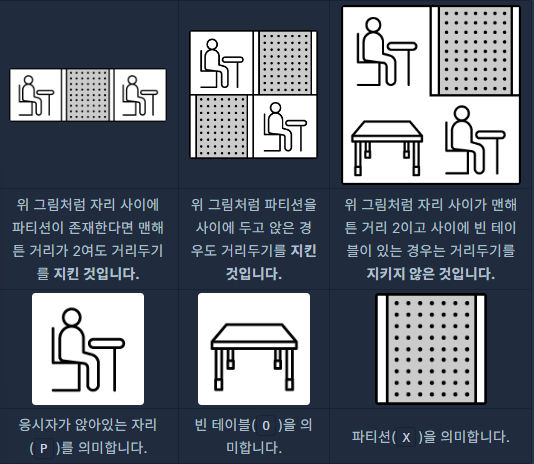

- 맨허튼 거리를 지키고 있는지 아닌지를 먼저 파악
- 지키지 않는다면, 사이에 파티션이 있는지 확인
- 만약 거리두기가 제대로 실행되고 있지 않다면 바로 종료

- 위와 같은 경우를 반복해서 한다.

> 생각
- 맨허튼 거리가 2이하라는 것은 어느정도의 범위인가?

XXOXX

XOOOX

OOPOO

XOOOX

XXOXX (여기서 )

- P에서 다른 P까지의 거리를 어떠한 방법으로 파악할 것인가?

queue에 넣을건데, P 지점에서 움직인 횟수를 저장해서 2번 간다.


In [18]:
places = [["POOOP", "OXXOX", "OPXPX", "OOXOX", "POXXP"], ["POOPX", "OXPXP", "PXXXO", "OXXXO", "OOOPP"], ["PXOPX", "OXOXP", "OXPOX", "OXXOP", "PXPOX"], ["OOOXX", "XOOOX", "OOOXX", "OXOOX", "OOOOO"], ["PXPXP", "XPXPX", "PXPXP", "XPXPX", "PXPXP"]]

In [68]:
def solution(places):

    offset = [(-1,0),(0,1),(1,0),(0,-1)]
    answer = []

    def is_disconnect(x, y):
        for dx_f, dy_f in offset:
            nx_f = dx_f + x
            ny_f = dy_f + y

            if nx_f < 0 or nx_f > 4 or ny_f < 0 or ny_f > 4:
                continue

            if place[nx_f][ny_f] == "P":
                return False

            elif place[nx_f][ny_f] == "X":
                continue

            for dx_s, dy_s in offset:
                if (dx_f + dx_s == 0) and (dy_f + dy_s == 0):
                    continue

                nx_s = nx_f + dx_s
                ny_s = ny_f + dy_s

                if nx_s < 0 or nx_s > 4 or ny_s < 0 or ny_s > 4:
                    continue

                if place[nx_s][ny_s] == "P":
                    return False

                elif place[nx_s][ny_s] == "X":
                    continue

        return True

    for place in places: # 대기실 1개씩
        check = True

        for x in range(5):
            if not check:
                break
            
            for y in range(5):
                if not check:
                    break
            
                if place[x][y] == 'P': # P가 아니면 넘기기
                    check = is_disconnect(x, y)
               
        if check:
            answer.append(1)
        else:
            answer.append(0)                

    return answer


In [69]:
solution(places)

[1, 0, 1, 1, 1]